In [ ]:
# PID: 5185680
# Name: Patrick Ijieh

# Recurrent Neural Network Homework

This is the 4th assignment for CAP 4630 and we will implement a basic RNN network and an LSTM network with Pytorch to solve two problems. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 points, including 15 bonus points)** \
You may use Machine Learning libaries like Scikit-learn for data preprocessing.

**Task Overview:**
- Implement a basic RNN network to solve time series prediction
- Implement an LSTM network to conduct sentiment analysis

## 1 - Implement Basic RNN network with Pytorch to predict time series##
### 1.1 Prepare the data (17 Points)

Prepare time series data for deep neural network training.

**Tasks:**
1. Load the given train and test data: "train.txt" and "test.txt". **(5 Points)**
2. Generate the **TRAIN** and **TEST** labels. **(5 Points)**
3. Normalize the **TRAIN** and **TEST** data with sklearn function "MinMaxScaler". **(5 Points)**
4. **PRINT OUT** the **TEST** data and label. **(2 Points)**

**Hints:**  
1. The length of original train data is 113 which starts from **"1949-01"** to **"1958-05"**. The length of original test data is 29, which starts from **"1958-07"** to **"1960-11"**.
2. Set the data types of both train and test data to "float32".
3. When you prepared input data X (sequences) and oupt data Y (labels), please consider the following relationship:
    - The sequence X should be the **past 12** datapoints in the time series, i.e., observation sequence with historical window of 12. You may check the time series data and think about the reason.
    - The label Y should be the **next 1** datapoint in the time series (one point ahead prediction).
4. The first 3 **TRAIN** data and label should be:

- trainX[0] = [[0.02203858 &nbsp; 0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp; 0.03856748]]
- trainY[0] = [0.03030303]

- trianX[1] = [[0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197  &nbsp; 0.08539945  &nbsp; 0.12121212  &nbsp; 0.12121212  &nbsp; 0.08815429  &nbsp; 0.04132232  &nbsp; 0.     &nbsp;  0.03856748   &nbsp; 0.03030303]]
- trainY[1] = [0.06060606]

- trainX[2] =  [[0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp;     0.03856748 &nbsp; 0.03030303 &nbsp; 0.06060606]]
- trainY[2] = [0.10192838]

5. Apply the MinMaxScaler to both the train and test data.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


6. After the preparation with scaler fitting, the shapes of trainX, trainY, testX, and testY are as follows:\
trainX.shape = (101, 1, 12)\
trainY.shape = (101,)\
testX.shape = (17, 1, 12)\
testY.shape = (17,)

In [ ]:
### write your code here
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler

train = np.loadtxt("./train.txt", dtype=np.float32, skiprows=1, delimiter=",", usecols=1)
test = np.loadtxt("./test.txt", dtype=np.float32, skiprows=1, delimiter=",", usecols=1)

scaler = MinMaxScaler()

train_transform = scaler.fit_transform(train.reshape(-1, 1))
test_transform = scaler.fit_transform(test.reshape(-1, 1))

trainX = []
trainY = []

for i in range(12, len(train_transform)):
  trainX.append([train_transform[i-12:i, 0]])
  trainY.append(train_transform[i, 0])

testX = []
testY = []
for i in range(12, len(test_transform)):
  testX.append([test_transform[i-12:i, 0]])
  testY.append(test_transform[i, 0])

trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)
print(f'{testX=}\n{testY=}')

testX=array([[[0.5801282 , 0.625     , 0.30128205, 0.15705132, 0.        ,
         0.08653843, 0.16025639, 0.1025641 , 0.3076923 , 0.27564108,
         0.3525641 , 0.5192307 ]],

       [[0.625     , 0.30128205, 0.15705132, 0.        , 0.08653843,
         0.16025639, 0.1025641 , 0.3076923 , 0.27564108, 0.3525641 ,
         0.5192307 , 0.7628205 ]],

       [[0.30128205, 0.15705132, 0.        , 0.08653843, 0.16025639,
         0.1025641 , 0.3076923 , 0.27564108, 0.3525641 , 0.5192307 ,
         0.7628205 , 0.798077  ]],

       [[0.15705132, 0.        , 0.08653843, 0.16025639, 0.1025641 ,
         0.3076923 , 0.27564108, 0.3525641 , 0.5192307 , 0.7628205 ,
         0.798077  , 0.49038458]],

       [[0.        , 0.08653843, 0.16025639, 0.1025641 , 0.3076923 ,
         0.27564108, 0.3525641 , 0.5192307 , 0.7628205 , 0.798077  ,
         0.49038458, 0.31089747]],

       [[0.08653843, 0.16025639, 0.1025641 , 0.3076923 , 0.27564108,
         0.3525641 , 0.5192307 , 0.7628205 , 0.798077  

### 1.2 - Build the RNN model (20 Points) ##


Build an RNN model with RNN cell.

**Tasks:**
1. Build an RNN model with 1 RNN layer with hidden_size = 4 and 1 Linear layer.  **(10 Points)**
2. initialize model, optimizer and criterion. **(5 Points)**
3. Train the model for **1000** epochs with **batch_size = 10**. **(5 Points)**

**Hints:**  
1. You use **nn.RNN** to specify RNN cells.
2. Use loss function (criterion) **MSELoss()** and select **Adam** optimizer with **learning_rate=0.005** and other default settings.

In [ ]:
### write your code here
from torchsummary import summary
import random

batch_size = 10
epochs = 1000
learning_rate = 0.005

class model(nn.Module):
  def __init__(self):
    super(model, self).__init__()
    self.rnncell = nn.RNN(12, 4, 1)
    self.linear = nn.Linear(4, 1)

  def forward(self, x):
    x, _ = self.rnncell(x)
    x = F.relu(x)
    output = self.linear(x)
    return output

device = 'cuda' if torch.cuda.is_available() else 'cpu'

rnn = model().to(device)
summary(rnn, (101, 12))

optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

sequences = torch.from_numpy(trainX)
labels = torch.from_numpy(trainY)

for epoch in range(epochs):
  rnn.train()

  for i in range(0, len(trainX), batch_size):
    optimizer.zero_grad()
    curr_sequences = sequences[i:i+batch_size]
    curr_labels = labels[i:i+batch_size]
    outputs = rnn(curr_sequences)
    loss = criterion(outputs, curr_labels)
    loss.backward()
    optimizer.step()

  if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
               RNN-1  [[-1, 101, 4], [-1, 101, 4]]               0
            Linear-2               [-1, 101, 1]               5
Total params: 5
Trainable params: 5
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.24
Params size (MB): 0.00
Estimated Total Size (MB): 1.25
----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/1000], Loss: 0.0000
Epoch [200/1000], Loss: 0.0005
Epoch [300/1000], Loss: 0.0000
Epoch [400/1000], Loss: 0.0002
Epoch [500/1000], Loss: 0.0007
Epoch [600/1000], Loss: 0.0003
Epoch [700/1000], Loss: 0.0004
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0006


### 1.3 Evaluate Predictive Model Performance (10 Points)

Predict datapoints with the observed datapoints and trained model.

**Tasks:**
1. Do direct prediction on train and test datapoints with the obtained model in section 1.2. **(2 Points)**
2. Scale the prediction results back to original representation with the scaler.(scaler.inverse_transform function) **(3 Points)**
3. Calculate root mean squared error (RMSE) and **print out** the error for **both TRAIN and TEST**. **(3 Points)**
4. **Plot** the **TEST** label and prediction. **(2 Points)**


**Hints:**  
1. Scale back the predictions with the build-in function "scaler.inverse_transform".\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
2. For validation: **Train Score: 125.37 RMSE Test Score: 44.90 RMSE**
3. The plot for validation is shown below (observation test data are blue and prediction results are orange):
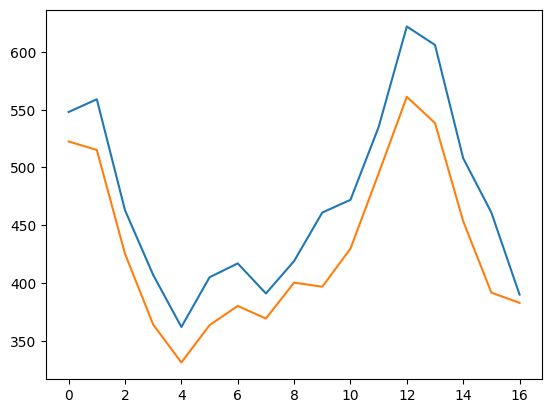

<span style="color:magenta">
**KEY FOR TAs:\
Train Score: 15.16
Test Score: 32.17 are correct.
    The corresponding figures could be different from the one above, but should be reasonable.**
</span>


Train Score: 40.70203064787233 RMSE
Test Score: 96.48798778182585 RMSE


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([101])) that is different to the input size (torch.Size([101, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


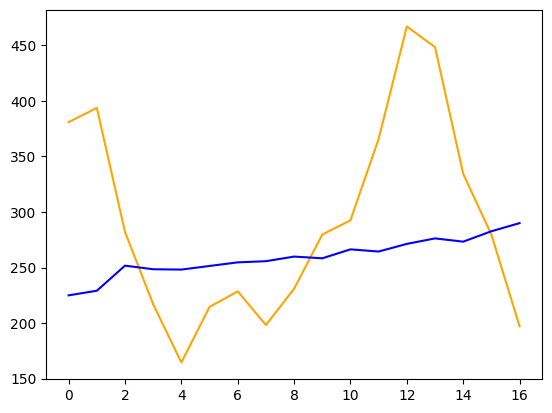

In [ ]:
### write your code here
scaler.fit(train.reshape(-1, 1))

sequences = torch.from_numpy(trainX)
labels = torch.from_numpy(trainY)

test_sequences = torch.from_numpy(testX)
test_labels = torch.from_numpy(testY)

def train_model(rnn: model, scaler: MinMaxScaler, optim: torch.optim.Adam, loss_function: nn.MSELoss, sequences: torch.Tensor, labels: torch.Tensor) -> None:
  rnn.train()
  optim.zero_grad()
  out = rnn(sequences)
  loss = loss_function(out, labels)
  loss.backward()
  optim.step()

  error = rmse(scaler, out, labels)
  print(f"Train Score: {error} RMSE")

def test_model(rnn: model, scaler: MinMaxScaler, optim: torch.optim.Adam, loss_function: nn.MSELoss, sequences: torch.Tensor, labels: torch.Tensor) -> tuple[list, list]:
  rnn.eval()
  optim.zero_grad()
  out = rnn(sequences)

  error = rmse(scaler, out, labels)
  print(f"Test Score: {error} RMSE")
  observed_data = get_data_points(scaler, labels)
  predicted_data = get_data_points(scaler, out)
  return (observed_data, predicted_data)

def rmse(scaler: MinMaxScaler, predicted: torch.Tensor, observed: torch.Tensor) -> float:
  sum = 0.0
  o = scaler.inverse_transform(observed.detach().numpy().reshape(-1, 1))
  p = scaler.inverse_transform(predicted.detach().numpy().reshape(-1, 1))

  for i in range(len(o)):
    sum += ((o[i][0]-p[i][0])**2)

  radicand = sum / len(o)
  root = radicand ** (1/2)
  return root

def get_data_points(scaler: MinMaxScaler, tensor: torch.Tensor) -> list[float]:
  arr = []
  t = scaler.inverse_transform(tensor.detach().numpy().reshape(-1, 1))
  for i in range(len(t)):
    arr.append(t[i][0])

  return arr

train_model(rnn, scaler, optimizer, criterion, sequences, labels)
obs, pred = test_model(rnn, scaler, optimizer, criterion, test_sequences, test_labels)
obs = np.array(obs)
pred = np.array(pred)
plt.plot(obs, color='orange')
plt.plot(pred, color='blue')

## 2 - Build an LSTM model to conduct sentiment analysis ##

### 2.1 Prepare the data (13 Points) ###

Prepare IMDB data for reccurent neural network training.

**Tasks:**
1. Load the data from IMDB review dataset and **print out** the lengths of sequences. **(3 Points)**
2. Preprocess review data to meet the network input requirement by specifying **number of words=1000**, setting **the analysis length of the review = 100**, and **padding the input sequences**. **(10 Points)**

**Hints:**  
1. You may load the IMDB data with keras.datasets.imdb.load_data(num_words=max_features). Here. max_features is set to **1000**.
2. You may use keras.preprocessing.sequence.pad_sequences(x_train, maxlen) to pad the input sequences and set maxlen to **100**.
3. You can start data preprocessing from scractch with raw file, but please get ready for a whole day work.

**Note:**\
We train the built LSTM-based model with ALL training data; the **validation set** (aka **development set**) is set with the **testing set** for model evaluation. This split is common in the application with limited sampled observation data, like NLP problems.

In [ ]:
### write your code here
import keras

max_features = 1000
maxlen = 100

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print(f"{len(x_train)=}\n{len(x_test)=}")

17464789/17464789 [==============================] - 0s 0us/step
len(x_train)=25000
len(x_test)=25000


### 2.2 - Design and train LSTM model (25 Points) ###

Build an LSTM model.

**Tasks:**
1. Build the LSTM model with **1 embedding layer**, **1 LSTM layer**, and **1 Linear layer**. The embedding vector is specified with the dimension of **8**. **(10 Points)**
2. Create LSTM model with **Adam** optimizer, **binary_crossentropy** loss function (BCELoss()). **(5 Points)**  
3. Train the LSTM model with **batch_size=64 for 10 epochs** and report **training and validation accuracies over epochs**. You need to use TensorDataset and DataLoader to split the data into batches with batch_size and shuffle the data. **(5 Points)**
4. **Print out** best validation accuracy. **(5 Points)**



**Hints:**  
1. Set input dimension to **1000** and output dimension to **8** for embedding layer.
2. You need to initialize hidden(h) and cell(c) for the lstm and always use h and c as input to your lstm layer. (For performance)
3. Set **hidden dimension = 8** for LSTM layer.
4. Use only the last layer as the input of linear layer (For performance)
5. Set activation function to **sigmoid** for Linear layer.
6. Use **shuffle=True** in Dataloader to ensure data shuffle
7. You may have some trouble with the data dimension, please consider using squeeze or unsqueeze to make two data have the same dimension.
8. Write a constructor with many configurations (number of layers, embedding dimension...) could save you a lot of time for the bonus questions since you can reuse the code here.

In [ ]:
### write your code here
from torchsummary import summary
from torch.utils.data import DataLoader, TensorDataset

batch_size = 64
epochs = 10

train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train).float())
test_data = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test).float())

train_loader = DataLoader(train_data,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(test_data,
                         batch_size=batch_size,
                         shuffle=True)

class Net(nn.Module):
  def __init__(self, embedding_dim: int=8, num_layers: int=1, input_dim: int=1000, maxlen: int=100):
    super(Net, self).__init__()
    self.num_layers = num_layers
    self.maxlen = maxlen
    self.embedding_dim = embedding_dim
    self.c = torch.zeros(num_layers, maxlen, embedding_dim)
    self.embedding = nn.Embedding(input_dim, embedding_dim=embedding_dim)
    self.lstm_layer = nn.LSTM(input_size=embedding_dim, hidden_size=embedding_dim, num_layers=num_layers)
    self.linear = nn.Linear(embedding_dim, 1)

  def forward(self, x):
    x = self.embedding(x)
    h = torch.zeros(self.num_layers, self.maxlen, self.embedding_dim)
    c = torch.zeros(self.num_layers, self.maxlen, self.embedding_dim)
    x, _ = self.lstm_layer(x, (h, c))
    x = x[:, -1, :]
    x = self.linear(x)
    output = torch.sigmoid(x)
    return output

device = 'cuda' if torch.cuda.is_available() else 'cpu'

lstm = Net().to(device)

#summary(lstm, (1000, 100), batch_size=batch_size)

optim = torch.optim.Adam(lstm.parameters())
loss_function = nn.BCELoss()

torch.autograd.set_detect_anomaly(True)

def train_lstm(lstm: Net, criterion: nn.BCELoss, optim: torch.optim.Adam, epochs: int, loader: DataLoader) -> None:
  for epoch in range(epochs):
    lstm.train()
    correct = 0
    total = 0
    runs = 0

    for inputs, labels in loader:
      optim.zero_grad()
      outputs = lstm(inputs)
      outputs = outputs.squeeze()
      loss = criterion(outputs, labels)
      loss.backward()
      optim.step()

      predicted_labels = (outputs.squeeze() >= 0.5).float()
      correct += (predicted_labels == labels).sum().item()
      total += labels.size(0)

    train_accuracy = correct / total * 100
    print(f"Epoch {epoch+1}/{epochs}: Train Accuracy = {train_accuracy:.4f}%")

def test_lstm(lstm: Net, x_test: torch.tensor, observed: torch.tensor) -> None:
  lstm.eval()
  accuracy = 0.0
  with torch.no_grad():
    prediction = lstm(x_test).squeeze()
    prediction = (prediction >= 0.5).float()

    accuracy = (prediction == observed).float().mean().item() * 100

  print(f"Validation Accuracy: {accuracy:.4f}%")

observed = torch.from_numpy(y_test).float()
test_points = torch.from_numpy(x_test)

train_lstm(lstm, loss_function, optim, epochs, train_loader)
test_lstm(lstm, test_points, observed)

Epoch 1/10: Train Accuracy = 50.2080%
Epoch 2/10: Train Accuracy = 52.1560%
Epoch 3/10: Train Accuracy = 53.1840%
Epoch 4/10: Train Accuracy = 54.4960%
Epoch 5/10: Train Accuracy = 55.5800%
Epoch 6/10: Train Accuracy = 56.0520%
Epoch 7/10: Train Accuracy = 56.6400%
Epoch 8/10: Train Accuracy = 57.2160%
Epoch 9/10: Train Accuracy = 57.9440%
Epoch 10/10: Train Accuracy = 57.9720%
Validation Accuracy: 56.1000%


### 2.3 - LSTM hyperparameter tuning (Bonus 15 Points) ###

Boost the performance of obtained LSTM (aka vanilla model) by hyperparameter tuning.

**Tasks:**
Note:
- All modificiations are directly conducted based on the vanilla model above (from 2.2).
- For each scenario, **report <span style="color:red"> BEST Validation Accuracy </span> and generate Training/Validation <span style="color:red"> Accuracy plots over epochs</span>**. You may just paste the plot figures in the cells with **Markdown mode**, or leave the result after running. **Make sure it is already correctly shown in your submitted file.**
1.  Scenario 1 (**5 points**):
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 16.
    - Modify the units of LSTM to 16.
2. Scenario 2 (**5 points**)
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
3. Scenario 3 (**5 points**)
    - Add one additional LSTM layer (totally 2 LSTM layers).
    - Modify the embedding dimension to 128.
    - Modify the units of LSTM to 128.
    - Increase analysis length for review data to maxlen = 200
**Hints:**
1. The best method for this part is to reuse your previous code.
2. This part is very time consuming (especially for Scenario 3).


In [ ]:
### write your code here
lstm = Net(num_layers=2, embedding_dim=16).to(device)
train_lstm(lstm, loss_function, optim, epochs, train_loader)
test_lstm(lstm, test_points, observed)

Epoch 1/10: Train Accuracy = 50.0000%
Epoch 2/10: Train Accuracy = 50.0000%
Epoch 3/10: Train Accuracy = 50.0000%
Epoch 4/10: Train Accuracy = 50.0000%
Epoch 5/10: Train Accuracy = 50.0000%
Epoch 6/10: Train Accuracy = 50.0000%
Epoch 7/10: Train Accuracy = 50.0000%
Epoch 8/10: Train Accuracy = 50.0000%
Epoch 9/10: Train Accuracy = 50.0000%
Epoch 10/10: Train Accuracy = 50.0000%
Validation Accuracy: 50.0000%


In [ ]:
### write your code here
lstm = Net(num_layers=2, embedding_dim=128).to(device)
train_lstm(lstm, loss_function, optim, epochs, train_loader)
test_lstm(lstm, test_points, observed)

Epoch 1/10: Train Accuracy = 49.9160%
Epoch 2/10: Train Accuracy = 49.9400%
Epoch 3/10: Train Accuracy = 49.9280%
Epoch 4/10: Train Accuracy = 49.9120%
Epoch 5/10: Train Accuracy = 49.9480%
Epoch 6/10: Train Accuracy = 49.9720%
Epoch 7/10: Train Accuracy = 49.9120%
Epoch 8/10: Train Accuracy = 49.9520%
Epoch 9/10: Train Accuracy = 49.8880%
Epoch 10/10: Train Accuracy = 49.8960%
Validation Accuracy: 49.8200%


In [ ]:
### write your code here
maxlen = 200

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train).float())
test_data = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test).float())

train_loader = DataLoader(train_data,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(test_data,
                         batch_size=batch_size,
                         shuffle=True)

lstm = Net(num_layers=2, embedding_dim=128, maxlen=200).to(device)
train_lstm(lstm, loss_function, optim, epochs, train_loader)
test_lstm(lstm, test_points, observed)

Epoch 1/10: Train Accuracy = 50.0000%
Epoch 2/10: Train Accuracy = 50.0120%
Epoch 3/10: Train Accuracy = 49.9960%
Epoch 4/10: Train Accuracy = 50.0040%
Epoch 5/10: Train Accuracy = 49.9960%
Epoch 6/10: Train Accuracy = 50.0080%
Epoch 7/10: Train Accuracy = 50.0120%
Epoch 8/10: Train Accuracy = 49.9920%
Epoch 9/10: Train Accuracy = 50.0000%
Epoch 10/10: Train Accuracy = 50.0040%


RuntimeError: ignored